## Teoría cuántica básica, Observables y Medidas

Oscar Santiago Merino Suarez

#### Simule el primer sistema cuántico descrito en la sección 4.1.

El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

In [29]:
import numpy as np

def normalize_state(ket):
    norm = np.linalg.norm(ket)
    if norm == 0:
        raise ValueError("El vector de estado no puede ser el vector nulo.")
    return ket / norm

def compute_probabilities(ket):
    norm_ket = normalize_state(ket)
    probabilities = np.abs(norm_ket) ** 2
    return probabilities

n = 5  # Número de posiciones discretas
ket = np.array([1 + 1j, 2j, 1, 1 - 1j, 1 - 2j], dtype=complex)  

probabilities = compute_probabilities(ket)

for i, p in enumerate(probabilities):
    print(f"Probabilidad de encontrar la partícula en x_{i}: {p:.4f}")

Probabilidad de encontrar la partícula en x_0: 0.1429
Probabilidad de encontrar la partícula en x_1: 0.2857
Probabilidad de encontrar la partícula en x_2: 0.0714
Probabilidad de encontrar la partícula en x_3: 0.1429
Probabilidad de encontrar la partícula en x_4: 0.3571


2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [30]:
import numpy as np

def normalize_state(ket):
    norm = np.linalg.norm(ket)
    if norm == 0:
        raise ValueError("El vector de estado no puede ser el vector nulo.")
    return ket / norm

def transition_probability(ket1, ket2):
    norm_ket1 = normalize_state(ket1)
    norm_ket2 = normalize_state(ket2)
    return np.abs(np.vdot(norm_ket1, norm_ket2)) ** 2


ket1 = np.array([1, 1j, -1j], dtype=complex)
ket2 = np.array([5, 3j, 2j], dtype=complex) 
transition_prob = transition_probability(ket1, ket2)
print(f"Probabilidad de transitar de ket1 a ket2: {transition_prob:.4f}")



Probabilidad de transitar de ket1 a ket2: 0.3158


## Complete los retos de programación del capítulo 4

1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

![Amplitud](imagenes/ima1.png)

In [31]:
import numpy as np

# Definir los kets
ket_final =  np.array([1j, 1])
ket_inicial =  np.array([1, -1j])

# Calcular la amplitud de transicion
amplitud = np.vdot(ket_final, ket_inicial)

print("Amplitud de transición:", amplitud)



Amplitud de transición: -2j


2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [53]:
import numpy as np

# Verifica si una matriz es hermitiana y calcula la media y varianza
def expectation_value_and_variance(observable, ket):
    hermitian = np.allclose(observable, observable.conj().T)
    print("La matriz es hermitiana" if hermitian else "La matriz no es hermitiana")
    if not hermitian:
        return None, None
    mean = np.vdot(ket, np.dot(observable, ket))
    variance = np.vdot(ket, np.dot(np.dot(observable, observable), ket)) - mean**2
    return mean, variance

# Ejemplo de uso
observable = np.array([[1 , 1j], [-1j, 1]])
ket = np.array([1/np.sqrt(2) + 1j/np.sqrt(2), 1/np.sqrt(2) - 1j/np.sqrt(2)])
mean, variance = expectation_value_and_variance(observable, ket)
if mean is not None:
    print("Valor esperado:", mean)
    print("Varianza:", variance)



La matriz es hermitiana
Valor esperado: (3.999999999999999+0j)
Varianza: (-7.999999999999995+0j)


3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [54]:
import numpy as np

# Calcula los valores propios y probabilidades de transición
def eigenvalues_and_transition_probabilities(observable, ket):
    if not np.allclose(observable, observable.conj().T):
        print("La matriz no es hermitiana")
        return None, None
    else:
        print("La matriz es hermitiana")
    eigenvalues, eigenvectors = np.linalg.eigh(observable)
    probabilities = np.abs(np.dot(eigenvectors.conj().T, ket)) ** 2
    return eigenvalues, probabilities

# Ejemplo de uso
observable = np.array([[1 , 1j], [-1j, -1]])
ket = np.array([1/np.sqrt(2) + 1j/np.sqrt(2), 1/np.sqrt(2) - 1j/np.sqrt(2)])

eigenvalues, probabilities = eigenvalues_and_transition_probabilities(observable, ket)
if eigenvalues is not None:
    print("Valores propios:", eigenvalues)
    print("Probabilidades de transición:", probabilities)


La matriz es hermitiana
Valores propios: [-1.41421356  1.41421356]
Probabilidades de transición: [0.29289322 1.70710678]


4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [55]:
import numpy as np

# Calcula la evolución del estado inicial bajo una serie de matrices unitarias U
def system_evolution(U_list, ket):
    final_state = ket
    for U in U_list:
        if not np.allclose(np.dot(U, U.conj().T), np.eye(U.shape[0])):
            raise ValueError("La matriz no es unitaria")
        final_state = np.dot(U, final_state)
    return final_state

# Ejemplo de uso con matrices unitarias
U1 = np.array([[0, 1j], [-1j, 0]])
U2 = np.array([[1, 0], [0, -1]])
k0 = np.array([1 + 1j, 0])
k_final = system_evolution([U1, U2], k0)
print("Estado final:", k_final)

Estado final: [ 0.+0.j -1.+1.j]


### Realice los siguientes problemas e incluyalos como ejemplos

Modele en su librería los problemas

4.3.1

4.3.2

4.4.1

4.4.2

Desarrolle e incluya en el Github una discusión de los ejercicios 4.5.2 y 4.5.3

4.3.1

Find all the possible states the system described in Exercise 4.2.2 can transition into after a measurement has been carried out.

(Encuentre todos los estados posibles a los que puede llegar el sistema descrito en el Ejercicio 4.2.2 después de realizar una medición.)

In [57]:
import numpy as np

def calcular_estado(matriz, estado):
    return np.dot(matriz, estado)

def calcular_probabilidades(estado):
    return np.abs(estado)**2

# Estado inicial y operador
estado_inicial = np.array([1, 0])
Sx = np.array([[0, 1], [1, 0]])

# Estado resultante y probabilidades
estado_resultante = calcular_estado(Sx, estado_inicial)
probabilidades = calcular_probabilidades(estado_resultante)

print(f"La probabilidad de spin up: {probabilidades[0]}")
print(f"La probabilidad de spin down: {probabilidades[1]}")


La probabilidad de spin up: 0
La probabilidad de spin down: 1


4.3.2

Perform the same calculations as in the last example, using Exercise 4.3.1. Then draw the probability distribution of the eigenvalues as in the previous example.

(Realice los mismos cálculos que en el ejemplo anterior, utilizando el Ejercicio 4.3.1. Luego, dibuje la distribución de probabilidad de los valores propios como en el ejemplo anterior.)

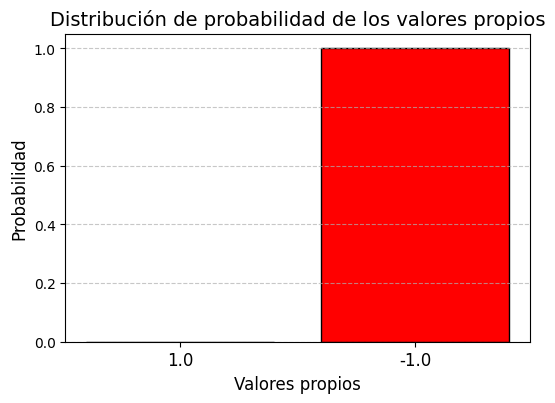

In [60]:
import numpy as np
import matplotlib.pyplot as plt

Sy = np.array([[0, 1], [1, 0]])
estado_final = calcular_estado(Sy, estado_inicial)

# Probabilidades
probabilidades_sy = calcular_probabilidades(estado_final)

# Valores propios
valores_propios, _ = np.linalg.eig(Sy)

# Graficacion
plt.figure(figsize=(6, 4))
plt.bar(range(len(valores_propios)), probabilidades_sy, color='red', edgecolor='black')
plt.xticks(range(len(valores_propios)), labels=np.round(valores_propios, 2), fontsize=12)
plt.xlabel('Valores propios', fontsize=12)
plt.ylabel('Probabilidad', fontsize=12)
plt.title('Distribución de probabilidad de los valores propios', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



4.4.1

Verificar que
$$ U_1 = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $$ 
and
$$ U = \frac{\sqrt{2}}{2}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$
Son matrices unitarias. Multiplíquelas y verifique que sus productos sean unitarios.

In [64]:
import numpy as np

# Definir las matrices
U1 = np.array([[0, 1], [1, 0]])  
U = (np.sqrt(2) / 2) * np.array([[1, 1], [1, -1]])  
# multiplicacion de la matriz u1 por su adjunta
U1_conj = U1.conj().T
U1_mult = np.dot(U1, U1_conj)
# Mostrar la matriz resultante
print("Multiplicación de U1 por su adjunta:")
print(U1_mult)

# Multiplicación de la matriz U por su adjunta
U_conj = U.conj().T
U_mult = np.dot(U, U_conj)
# Mostrar la matriz resultante
print("Multiplicación de U por su adjunta:")
print(U_mult)

# Multiplicación de la matriz U1 por la matriz U
U_product = np.dot(U1, U)

# Mostrar la matriz resultante
print("Multiplicación de U1 y U:")
print(U_product)


Multiplicación de U1 por su adjunta:
[[1 0]
 [0 1]]
Multiplicación de U por su adjunta:
[[1.00000000e+00 4.26642159e-17]
 [4.26642159e-17 1.00000000e+00]]
Multiplicación de U1 y U:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


4.4.2

Regrese al Ejemplo 3.3.2 (bola de billar cuántica) y mantenga el mismo vector de estado inicial.


$$ v = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} $$


,pero cambia el mapa unitario a
$$
U_4 = \frac{1}{\sqrt{2}}\begin{bmatrix} 
0 & 1 & 1 & 0 \\ 
i & 0 & 0 & 0 \\ 
1 & 0 & 0 & i \\ 
0 & 1 & -1 & 0 
\end{bmatrix} $$

Determinar el estado del sistema después de tres intervalos de tiempo. ¿Cuál es la probabilidad de que la bola cuántica se encuentre en el punto 3?

In [ ]:
import numpy as np

# Factor de normalización
factor = 1 / np.sqrt(2)

# Definir la matriz de evolución con el factor aplicado
mapa = factor * np.array([
    [0, 1, 1, 0],
    [1j, 0, 0, 1],
    [1, 0, 0, 1j],
    [0, 1, -1, 0]
])

# Estado inicial
estado_actual = np.array([1, 0, 0, 0], dtype=complex)

# Aplicar la evolución por 3 pasos
for _ in range(3):
    estado_actual =  np.dot(mapa, estado_actual)

# Calcular la probabilidad de estar en el punto 3
prob_punto_3 = np.abs(estado_actual[2])**2

# Imprimir resultados
print("Estado final luego de 3 iteraciones:", estado_actual)
print("Probabilidad de hallar la bola en el punto 3:", prob_punto_3)



Estado final luego de 3 iteraciones: [ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]
Probabilidad de hallar la bola en el punto 3: 0.0


## 4.5.2 Estado genérico de un sistema de partículas con espín

En mecánica cuántica, el estado de un sistema de varias partículas se representa mediante el **producto tensorial** de los estados individuales de cada partícula.  

Para un sistema de **dos partículas con espín**, el estado general se denota como:

$$
|\Psi\rangle
$$

Este estado se construye a partir de los estados individuales \( |\psi_1\rangle \) y \( |\psi_2\rangle \), aplicando el producto tensorial:

$$
|\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle
$$

### Extensión a un sistema de \( n \) partículas

Si el sistema tiene \( n \) partículas, el procedimiento es el mismo, pero extendido a \( n \) términos:

$$
|\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle \otimes \cdots \otimes |\psi_n\rangle
$$

Este formalismo es crucial en la descripción de **sistemas cuánticos multiparticulares**, como en la computación cuántica, donde cada qubit representa un sistema de espín y su estado se describe con este producto tensorial.

---

## 4.5.3 Separabilidad de un estado cuántico

Dado el estado:

$$
|\phi\rangle = |x_0\rangle \otimes |y_1\rangle + |x_1\rangle \otimes |y_1\rangle.
$$

Queremos verificar si este estado es **separable**, es decir, si se puede escribir como el producto tensorial de dos estados individuales.

### Paso 1: Reescribir el estado

El estado original es:

$$
|\phi\rangle = |x_0\rangle \otimes |y_1\rangle + |x_1\rangle \otimes |y_1\rangle.
$$

### Paso 2: Buscar términos comunes

Observamos que \( |y_1\rangle \) aparece en ambos términos, por lo que podemos **factorizarlo**:

$$
|\phi\rangle = (|x_0\rangle + |x_1\rangle) \otimes |y_1\rangle.
$$

### Paso 3: Interpretación del resultado

El estado ahora está expresado como el **producto tensorial** de:

$$
|x_0\rangle + |x_1\rangle \quad \text{(una combinación de los estados } |x_0\rangle \text{ y } |x_1\rangle \text{)}
$$

$$
|y_1\rangle \quad \text{(estado asociado a la segunda partícula)}
$$

Dado que podemos escribir \( |\phi\rangle \) como el producto de dos estados individuales, **el estado es separable**.


